In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

In [2]:
datadir ='/Users/francesco/Desktop/Data/'

# Read the dataframes
df_bed = xr.open_dataset(datadir + 'BedMachineAntarctica-v3.nc')
df_melt = xr.open_dataset(datadir + 'bmelt_bmachine_grid_v1.nc')

In [3]:
#ADD NAMES OF THE GLACIER IN ORDER TO SELECT THE INTERESTING ONES

df_names = pd.read_csv(datadir + 'Merged_Integrated_melt_rates.csv')




In [4]:
#bed = df_bed.bed
thickness = df_bed.thickness
melt = df_melt.melt

In [5]:
melt


<xarray.DataArray 'melt' (time: 26, y: 13333, x: 13333)>
[4621991114 values with dtype=float64]
Coordinates:
  * x        (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
  * y        (y) int32 3333000 3332500 3332000 ... -3332000 -3332500 -3333000
  * time     (time) datetime64[ns] 1992-01-01 1993-01-01 ... 2017-01-01
Attributes:
    units:        m/yr water equivalent
    description:  Antarctic ice basal melt rate

In [6]:
thickness

<xarray.DataArray 'thickness' (y: 13333, x: 13333)>
[177768889 values with dtype=float32]
Coordinates:
  * x        (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
  * y        (y) int32 3333000 3332500 3332000 ... -3332000 -3332500 -3333000
Attributes:
    long_name:      ice thickness
    standard_name:  land_ice_thickness
    units:          meters
    grid_mapping:   mapping
    source:         Mathieu Morlighem

In [7]:
x = df_bed.x
y = df_bed.y
time = df_melt.time

In [8]:
#Creatinng the mesh grid
coord = x.values
X, Y = np.meshgrid(coord, coord)

In [9]:
# Plot the bed with the meshgrid

''' 
plt.figure(figsize=(10,10))
plt.pcolormesh(X, Y, bed, cmap='gist_earth')
plt.colorbar()
plt.show()
'''


" \nplt.figure(figsize=(10,10))\nplt.pcolormesh(X, Y, bed, cmap='gist_earth')\nplt.colorbar()\nplt.show()\n"

In [10]:
#Now I want to select the areas of the region of interest, and there I want to calculate the basal melt, 
#just for the thickest part of the glacier, i.e. the part of the glacier where the thickness is above the mean value

In [11]:
import glob
import pandas as pd
import os
from shapely.geometry import shape
import csv
#from mapxy import mapxy
import pyproj
#from ps_latlon_conversion import xyscale_south
import pyproj
#import ogr
from osgeo import gdal, osr
import matplotlib.pyplot as plt
import fiona
import rasterio
import rasterio.transform
import rasterio.mask
from fiona import Feature, Geometry
from shapely.geometry import mapping, shape

In [12]:
#get information from the shp file, without creating the output tif files

path_to_tif = '/Users/francesco/Desktop/Data/GEOTIFFs/'
shapefile_path = '/Users/francesco/Desktop/Data/ice_shelf.shp'

ids = []
Names = []
lat_lon_coords = []
regions = []
boundaries = []
areas = []


#Here i just uses the first tif file to get the information, so 1992
file_tif = path_to_tif + 'melt_' + str(1992) + '_warp_ps.tif'
print(file_tif)


shapefile=fiona.open(shapefile_path)
print(shapefile.schema['properties'])


for feature in shapefile:


    id = feature['id']
    name=feature['properties']['name']
    geometry=feature['geometry']
    region = feature['properties']['regions']
    lat = feature['properties']['latitude']
    lon = feature['properties']['longitude']
    #thickness = feature['properties']['thickness_']

    bounds=shape(geometry).bounds
    xmin=bounds[0];ymin=bounds[1];xmax=bounds[2];ymax=bounds[3]

    area_temp = np.abs((xmax-xmin)*(ymax-ymin))

    #Taking the info
    ids.append(id)
    Names.append(name)
    lat_lon_coords.append([lat,lon])
    regions.append(region)
    boundaries.append([xmin,xmax,ymin,ymax])
    areas.append(area_temp)


/Users/francesco/Desktop/Data/GEOTIFFs/melt_1992_warp_ps.tif
{'id': 'int:10', 'name': 'str:30', 'regions': 'str:11', 'type': 'str:2', 'is_index': 'int:10', 'ice_shelf_': 'str:50', 'measures_n': 'str:50', 'latitude': 'float:24.15', 'longitude': 'float:24.15', 'thickness_': 'float:24.15', 'thicknes_1': 'float:24.15', 'smb_mean_9': 'float:24.15', 'smb_mean_1': 'float:24.15', 'ss_gl_flux': 'float:24.15', 'ss_gl_fl_1': 'float:24.15', 'ss_calving': 'float:24.15', 'ss_calvi_1': 'float:24.15', 'model_gl_f': 'float:24.15', 'instant_co': 'float:24.15', 'mass_loss_': 'float:24.15', 'mass_los_1': 'float:24.15', 'mass_los_2': 'float:24.15', 'mass_los_3': 'float:24.15', 'mass_los_4': 'float:24.15', 'mass_los_5': 'float:24.15', 'mass_los_6': 'float:24.15', 'mass_los_7': 'float:24.15', 'mass_los_8': 'float:24.15', 'mass_los_9': 'float:24.15', 'mass_los10': 'float:24.15', 'mass_los11': 'float:24.15', 'mass_los12': 'float:24.15', 'mass_los13': 'float:24.15', 'mass_los14': 'float:24.15', 'mass_los15': 'f

In [13]:
boundaries[0]

[-684949.8231466373, -679606.4059004509, 1350457.0655274529, 1356261.687969957]

In [14]:
#Just with one

x_min , x_max, y_min, y_max =  boundaries[0]
mask = (x > x_min) & (x < x_max) & (y > y_min) & (y < y_max)

masked_thickness_0 = np.ma.masked_array(thickness, mask=~mask)
thickness_0 = np.mean(masked_thickness_0)



In [15]:
blocco qui

SyntaxError: invalid syntax (1293021500.py, line 1)

In [ ]:

'''
thickness_mean = np.zeros(len(ids))
melt_mean = np.zeros((len(ids), len(time)))
print(np.shape(melt_mean))


for glacier in range(0, len(ids)):
    x_min , x_max, y_min, y_max =  boundaries[glacier]
    mask = (x > x_min) & (x < x_max) & (y > y_min) & (y < y_max)
    print('Glacier number: ', glacier)
    
    # index both thickness and melt using the mask
    thickness_roi = thickness.where(mask, drop=True)
    thickness_mean_roi = np.mean(thickness_roi)
    thickness_mean[glacier] = thickness_mean_roi

    
    for t in range(0, len(time)):
        melt_roi = melt[t].where(mask, drop=True)
        melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
        melt_mean[glacier, t] = melt_mean_temp




# save as CSV file
np.savetxt('thickness_and_basal_mean.csv', np.column_stack((thickness_mean, melt_mean)), delimiter=',')
np.savetxt('melt_mean.csv', melt_mean, delimiter=',')
np.savetxt('thickness_mean.csv', thickness_mean, delimiter=',')
'''


(183, 26)
Glacier number:  0
Glacier number:  1
Glacier number:  2
Glacier number:  3
Glacier number:  4
Glacier number:  5
Glacier number:  6
Glacier number:  7
Glacier number:  8


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  9
Glacier number:  10
Glacier number:  11


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  12
Glacier number:  13


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  14


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  15
Glacier number:  16
Glacier number:  17
Glacier number:  18


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  19
Glacier number:  20


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  21


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  22


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  23


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  24
Glacier number:  25


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  26
Glacier number:  27
Glacier number:  28
Glacier number:  29
Glacier number:  30


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  31


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  32
Glacier number:  33
Glacier number:  34
Glacier number:  35
Glacier number:  36
Glacier number:  37
Glacier number:  38
Glacier number:  39
Glacier number:  40
Glacier number:  41
Glacier number:  42
Glacier number:  43


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  44
Glacier number:  45
Glacier number:  46
Glacier number:  47
Glacier number:  48


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  49
Glacier number:  50
Glacier number:  51
Glacier number:  52
Glacier number:  53
Glacier number:  54
Glacier number:  55
Glacier number:  56
Glacier number:  57
Glacier number:  58
Glacier number:  59
Glacier number:  60


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  61
Glacier number:  62
Glacier number:  63
Glacier number:  64
Glacier number:  65
Glacier number:  66
Glacier number:  67
Glacier number:  68
Glacier number:  69
Glacier number:  70
Glacier number:  71
Glacier number:  72
Glacier number:  73
Glacier number:  74
Glacier number:  75
Glacier number:  76


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  77
Glacier number:  78
Glacier number:  79
Glacier number:  80
Glacier number:  81
Glacier number:  82
Glacier number:  83
Glacier number:  84
Glacier number:  85
Glacier number:  86
Glacier number:  87
Glacier number:  88
Glacier number:  89
Glacier number:  90
Glacier number:  91
Glacier number:  92
Glacier number:  93


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  94


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  95
Glacier number:  96
Glacier number:  97
Glacier number:  98


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  99
Glacier number:  100
Glacier number:  101
Glacier number:  102
Glacier number:  103
Glacier number:  104
Glacier number:  105
Glacier number:  106
Glacier number:  107
Glacier number:  108
Glacier number:  109
Glacier number:  110
Glacier number:  111
Glacier number:  112
Glacier number:  113


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  114
Glacier number:  115
Glacier number:  116
Glacier number:  117
Glacier number:  118
Glacier number:  119
Glacier number:  120
Glacier number:  121
Glacier number:  122


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  123
Glacier number:  124
Glacier number:  125
Glacier number:  126
Glacier number:  127
Glacier number:  128
Glacier number:  129
Glacier number:  130
Glacier number:  131
Glacier number:  132
Glacier number:  133
Glacier number:  134
Glacier number:  135
Glacier number:  136


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  137
Glacier number:  138


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  139
Glacier number:  140


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  141
Glacier number:  142
Glacier number:  143
Glacier number:  144
Glacier number:  145
Glacier number:  146
Glacier number:  147
Glacier number:  148


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  149


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  150


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  151


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  152


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  153


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  154
Glacier number:  155


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  156


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  157
Glacier number:  158
Glacier number:  159
Glacier number:  160
Glacier number:  161


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  162


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  163


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  164


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  165


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  166


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  167
Glacier number:  168
Glacier number:  169
Glacier number:  170
Glacier number:  171
Glacier number:  172


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  173
Glacier number:  174
Glacier number:  175
Glacier number:  176
Glacier number:  177


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  178


/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_roi))
/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_11775/3238439142.py:23: RuntimeWarning: Mean of empty slice
  melt_mean_temp = np.nanmean(melt_roi.where(thickness_roi > thickness_mean_r

Glacier number:  179
Glacier number:  180
Glacier number:  181
Glacier number:  182


In [ ]:


df_names = pd.read_csv(datadir + 'Merged_Integrated_melt_rates.csv')

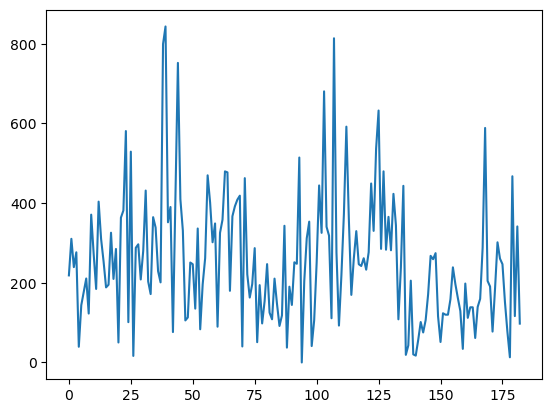

In [ ]:
plt.plot(thickness_mean)

In [ ]:
'''
interesting_glaciers = ['Pine_Island', 'Thwaites', 'Crosson', 'Dotson', 'Getz_2', 'Venable']
interesting_indices = np.where(np.isin(Glacier, interesting_glaciers))[0]

print(interesting_indices)
print(Glacier[interesting_indices])
len(Glacier[interesting_indices])

#Plot of the most interesting glaciers with linear regression and error

fig, axs = plt.subplots(3, 2, figsize=(15,10))
fig.suptitle('Melt rates of the 6 most interesting glaciers')


for i in range(len(interesting_indices)):
    axs[i//2,i%2].scatter(Years, Melting_rates[interesting_indices[i],:], color='blue', label='Melt rate', s=1)
    axs[i//2,i%2].plot(Years, lin_reg[interesting_indices[i],:], color='green', label='Linear regression' + str(round(lin_coeff[interesting_indices[i],0],3)) + ' m/yr')
    axs[i//2,i%2].fill_between(Years, Melting_rates[interesting_indices[i],:]-errors[interesting_indices[i],:], Melting_rates[interesting_indices[i],:]+errors[interesting_indices[i],:], color='red', alpha=0.2)
    axs[i//2,i%2].set_title(Glacier[interesting_indices][i])
    axs[i//2,i%2].set_xlabel('Years')
    axs[i//2,i%2].set_ylabel('Melt rate [m/yr]')
    axs[i//2,i%2].legend()
    axs[i//2,i%2].xaxis.set_label_coords(0.5, -0.2)

#PDF
plt.savefig('Interesting_glaciers.pdf', bbox_inches='tight', dpi=300)
plt.show()
'''

1.1120281429851757


In [ ]:
#PROVO PIU GIRI, (10.39 mins)
#Here I am creating the mask for each glacier, and then I am calculating the mean thickness for each of them

thickness_avg = np.zeros(len(ids))
indices = []


for glacier in range(0,len(ids)):
    
    x_min , x_max, y_min, y_max =  boundaries[glacier]
    print(x_min , x_max, y_min, y_max)
    #region = (x > x_min) & (x < x_max) & (y > y_min) & (y < y_max)
    thickness_avg[glacier] = np.mean(thickness.loc[x_min:x_max, y_min:y_max])
    print(thickness_avg[glacier])
    #mask_array.append(mask)

    #masked_thickness = np.ma.masked_array(thickness, mask=~mask)
    #thickness_avg[glacier] = np.mean(masked_thickness)

#np.save('mask_array.npy', mask_array)


-684949.8231466373 -679606.4059004509 1350457.0655274529 1356261.687969957
nan
-1602618.382115084 -1585124.07127867 -716755.9915840629 -706178.4405519058
nan
-1748911.8365881718 -1744271.0775894704 -363384.06828293443 -359132.68036936625
nan
-1169643.221693879 -1160746.8552546147 -1201924.930936041 -1192537.5079441648
nan
-1981086.1885591282 -1973092.7333091374 1056026.3180516576 1064144.7460062695
nan
-2115289.9142161473 -1611456.6713770553 906117.9659995941 1138004.9071948559
nan
-1551808.8722216657 -1501793.0806712098 815675.8643683549 855139.4656002375
nan
-2338763.8518804787 -2043814.1330347063 981946.4404985306 1294699.870209512
nan
1425549.6431008207 1430881.7895363593 1716462.006290416 1723950.029144651
nan
2070556.138298628 2132498.7303028395 1376179.0354148785 1415674.3978781917
nan
1359552.9986941654 1390819.611679953 1687856.170783563 1742948.6976300152
nan
1419423.6254333553 1427925.1318610688 1715383.7416350434 1726200.0268846727
nan
1812995.1036934077 1853300.0250172645 

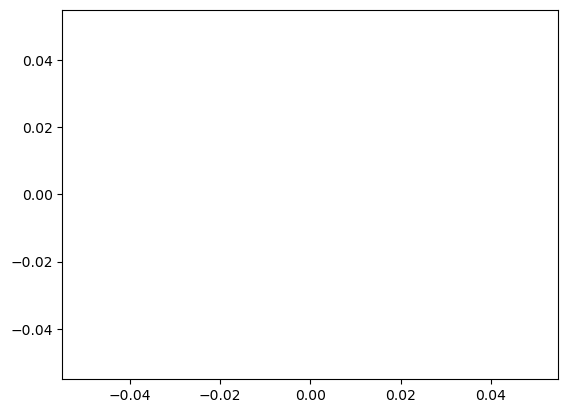

In [ ]:
#Calculate how many 0 are in the thickness_avg array
plt.plot(thickness_avg)

In [ ]:
#Loading the mask array
#mask_array = np.load('mask_array.npy')

array([False,  True])

In [ ]:
block here

In [ ]:
melt[1]

<xarray.DataArray 'melt' (y: 13333, x: 13333)>
[177768889 values with dtype=float64]
Coordinates:
  * x        (x) int32 -3333000 -3332500 -3332000 ... 3332000 3332500 3333000
  * y        (y) int32 3333000 3332500 3332000 ... -3332000 -3332500 -3333000
    time     datetime64[ns] 1993-01-01
Attributes:
    units:        m/yr water equivalent
    description:  Antarctic ice basal melt rate

In [ ]:
#NOT WORKING!!! RUNNED FOR 8 MINS, it just did one glace (counter is blocked at 0)

#I will now make a cycle that for each glacier goes through all the years and calculates the melt in the regions where 
#the thickness is above the mean value
melt_regional_time_series = np.zeros((len(ids),len(time)))
#ids = np.array(ids)


'''
for glacier in range(0,len(ids)):

    mask = mask_array[glacier]

    for t in range(0,len(time)):

        masked_melt_temp = np.ma.masked_array(melt[t], mask=~mask)
        melt_regional_time_series[glacier,t] = np.mean(masked_melt_temp)
        print(t)
'''

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


KeyboardInterrupt: 

In [ ]:
thickness_avg[0] = np.nanmean(thickness.loc[x_ranges[0][0]:x_ranges[0][1],y_ranges[0][0]:y_ranges[0][1]])

/var/folders/9n/18cd5sld4lv1jvk0nw84p_bh0000gq/T/ipykernel_23465/3519627515.py:1: RuntimeWarning: Mean of empty slice
  thickness_avg[0] = np.nanmean(thickness.loc[x_ranges[0][0]:x_ranges[0][1],y_ranges[0][0]:y_ranges[0][1]])


In [ ]:
thickness.loc[x_ranges[0][0]:x_ranges[0][1],y_ranges[0][0]:y_ranges[0][1]].shape

(0, 12)

In [ ]:
glacier_region[0].shape
np.unique(glacier_region[0])

array([False,  True])